## Ensemble means and CMIP multi models

This notebook will show an example of finding a CMIP6 ensemble model using `esmvalcore`.
We will run some preprocessors to make a simple time series plot of each of the ensemble members and the model ensemble mean.

We can then use this process to get a number of other models and show a multi-model mean of a number of model ensemble means.

In [1]:
from esmvalcore.dataset import Dataset


/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [2]:
from esmvalcore.preprocessor import (
    ensemble_statistics,
    climate_statistics,
    convert_units,
    anomalies,
    area_statistics,
    annual_statistics,
    )

import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [3]:
# ensemble means for models of interest(vis project):
#CESM2 :11, CanESM5: 64(65 Omon), MIROC6: 50 r(1:50)i1p1f1, NorESM2-LM: 4, ACCESS-ESM1-5: 40 r(1:40)i1p1f1

### Find data
- Using '*' as wildcards for the facets in Dataset.
- `.from_files()` to find all the data from local files that match the search

In [4]:
var = Dataset(
    short_name='ts', mip='Amon', project='CMIP6',
    activity='CMIP',  dataset='CESM2',
    ensemble='*',
    institute='*', grid='*',
    exp='historical', timerange='*'
)
# number of datasets and list
len(list(var.from_files())), list(var.from_files())
# var.load()

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/esmvalcore/config/_config.py:59: ESMValCoreDeprecationWarning: Usage of extra facets located in ~/.esmvaltool/extra_facets has been deprecated in ESMValCore version 2.13.0 and is scheduled for removal in version 2.15.0. Please use the configuration option `extra_facets` instead (see https://github.com/ESMValGroup/ESMValCore/pull/2747 for details). To silent this warning and ignore deprecated extra facets, set the environment variable ESMVALTOOL_USE_NEW_EXTRA_FACETS_CONFIG=1.
  warn_if_old_extra_facets_exist()


(11,
 [Dataset:
  {'dataset': 'CESM2',
   'project': 'CMIP6',
   'mip': 'Amon',
   'short_name': 'ts',
   'activity': 'CMIP',
   'ensemble': 'r10i1p1f1',
   'exp': 'historical',
   'grid': 'gn',
   'institute': 'NCAR',
   'timerange': '185001/201412'},
  Dataset:
  {'dataset': 'CESM2',
   'project': 'CMIP6',
   'mip': 'Amon',
   'short_name': 'ts',
   'activity': 'CMIP',
   'ensemble': 'r11i1p1f1',
   'exp': 'historical',
   'grid': 'gn',
   'institute': 'NCAR',
   'timerange': '185001/201412'},
  Dataset:
  {'dataset': 'CESM2',
   'project': 'CMIP6',
   'mip': 'Amon',
   'short_name': 'ts',
   'activity': 'CMIP',
   'ensemble': 'r1i1p1f1',
   'exp': 'historical',
   'grid': 'gn',
   'institute': 'NCAR',
   'timerange': '185001/201412'},
  Dataset:
  {'dataset': 'CESM2',
   'project': 'CMIP6',
   'mip': 'Amon',
   'short_name': 'ts',
   'activity': 'CMIP',
   'ensemble': 'r2i1p1f1',
   'exp': 'historical',
   'grid': 'gn',
   'institute': 'NCAR',
   'timerange': '185001/201412'},
  Dat

### example preprocessing

In [5]:
time_ref = {'start_year':1850, 'start_month':1, 'start_day':1, 'end_year':1900, 'end_month':12, 'end_day':31}
anom = anomalies(var.load(), period ='monthly', reference=time_ref)

### Preprocess and plot
- The `var` dataset from files has multiple ensembles of the model which can be plotted separately through the list in a loop.
- The multiple ensembles are also loaded as an aggregate from `var`

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var =

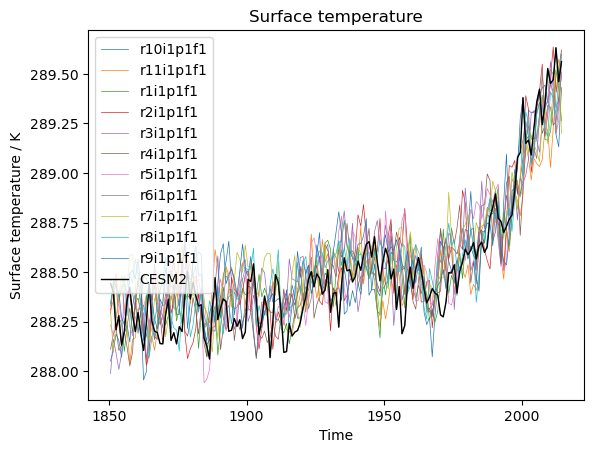

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/_thread_safe_nc.py:340: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]


In [6]:
for ds in list(var.from_files()):
    cube = ds.load()
    cube = annual_statistics(cube, 'mean')
    qplt.plot(area_statistics(cube, 'mean'), label=ds['ensemble'], linewidth=0.5)

#do same for var dataset load
cube_var = annual_statistics(var.load(), 'mean')
qplt.plot(area_statistics(cube_var, 'mean'), label=var['dataset'], linewidth=1, color='k')
plt.legend()

## Multi model means

In [7]:
models = ['CESM2', 'CanESM5', 'MIROC6', 'NorESM2-LM', 'ACCESS-ESM1-5']
# Substitute data models

model_datasets = []
for model_id in models:
    dataset = var.copy(dataset=model_id)
    model_datasets.append(dataset)
model_datasets

[Dataset:
 {'dataset': 'CESM2',
  'project': 'CMIP6',
  'mip': 'Amon',
  'short_name': 'ts',
  'activity': 'CMIP',
  'ensemble': '*',
  'exp': 'historical',
  'frequency': 'mon',
  'grid': '*',
  'institute': '*',
  'long_name': 'Surface Temperature',
  'modeling_realm': ['atmos'],
  'original_short_name': 'ts',
  'standard_name': 'surface_temperature',
  'timerange': '185001/201412',
  'units': 'K'}
 session: 'session-46f75e36-2a58-49b0-b47a-55f4374f465c_20251126_030118',
 Dataset:
 {'dataset': 'CanESM5',
  'project': 'CMIP6',
  'mip': 'Amon',
  'short_name': 'ts',
  'activity': 'CMIP',
  'ensemble': '*',
  'exp': 'historical',
  'frequency': 'mon',
  'grid': '*',
  'institute': '*',
  'long_name': 'Surface Temperature',
  'modeling_realm': ['atmos'],
  'original_short_name': 'ts',
  'standard_name': 'surface_temperature',
  'timerange': '185001/201412',
  'units': 'K'}
 session: 'session-46f75e36-2a58-49b0-b47a-55f4374f465c_20251126_030118',
 Dataset:
 {'dataset': 'MIROC6',
  'projec

In [8]:
model_ens_cubes = {}
for mod_var in model_datasets:
    ensembles = [ds['ensemble'] for ds in list(mod_var.from_files())]
    print(mod_var['dataset'], len(list(mod_var.from_files())), ensembles)
    model_ens_cubes[mod_var['dataset']] = mod_var.load()


CESM2 11 ['r10i1p1f1', 'r11i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
CanESM5 64 ['r10i1p1f1', 'r10i1p2f1', 'r11i1p1f1', 'r11i1p2f1', 'r12i1p1f1', 'r12i1p2f1', 'r13i1p1f1', 'r13i1p2f1', 'r14i1p1f1', 'r14i1p2f1', 'r15i1p1f1', 'r15i1p2f1', 'r16i1p1f1', 'r16i1p2f1', 'r17i1p1f1', 'r17i1p2f1', 'r18i1p1f1', 'r18i1p2f1', 'r19i1p1f1', 'r19i1p2f1', 'r1i1p1f1', 'r1i1p2f1', 'r20i1p1f1', 'r20i1p2f1', 'r21i1p1f1', 'r21i1p2f1', 'r22i1p1f1', 'r22i1p2f1', 'r23i1p1f1', 'r23i1p2f1', 'r24i1p1f1', 'r24i1p2f1', 'r25i1p1f1', 'r25i1p2f1', 'r27i1p2f1', 'r28i1p2f1', 'r29i1p2f1', 'r2i1p1f1', 'r2i1p2f1', 'r30i1p2f1', 'r31i1p2f1', 'r32i1p2f1', 'r33i1p2f1', 'r34i1p2f1', 'r35i1p2f1', 'r36i1p2f1', 'r37i1p2f1', 'r38i1p2f1', 'r39i1p2f1', 'r3i1p1f1', 'r3i1p2f1', 'r40i1p2f1', 'r4i1p1f1', 'r4i1p2f1', 'r5i1p1f1', 'r5i1p2f1', 'r6i1p1f1', 'r6i1p2f1', 'r7i1p1f1', 'r7i1p2f1', 'r8i1p1f1', 'r8i1p2f1', 'r9i1p1f1', 'r9i1p2f1']
MIROC6 50 ['r10i1p1f1', 'r11i1

In [9]:
from esmvalcore.preprocessor import multi_model_statistics

In [10]:
model_ens_cubes

{'CESM2': <iris 'Cube' of surface_temperature / (K) (time: 1980; latitude: 192; longitude: 288)>,
 'CanESM5': <iris 'Cube' of surface_temperature / (K) (time: 1980; latitude: 64; longitude: 128)>,
 'MIROC6': <iris 'Cube' of surface_temperature / (K) (time: 1980; latitude: 128; longitude: 256)>,
 'NorESM2-LM': <iris 'Cube' of surface_temperature / (K) (time: 1980; latitude: 96; longitude: 144)>,
 'ACCESS-ESM1-5': <iris 'Cube' of surface_temperature / (K) (time: 1980; latitude: 145; longitude: 192)>}

In [11]:

prep_cubes = {model_id: annual_statistics(cube, operator="mean") for model_id, cube in model_ens_cubes.items()}
prep_cubes = {model_id: area_statistics(cube, operator="mean") for model_id, cube in prep_cubes.items()}

cubes = [cube for mod, cube in prep_cubes.items()]
res_cube = multi_model_statistics(cubes, statistics=["mean"], span="overlap")['mean']
# cube = convert_units(cube, units="mm/yr")

In [12]:
# cubes[0].attributes['source_id']
cubes[0].coords()

[<DimCoord: time / (days since 1850-1-1 00:00:00)  [...]+bounds  shape(165,)>,
 <DimCoord: latitude / (degrees_north)  [0.]+bounds>,
 <DimCoord: longitude / (degrees_east)  [179.375]+bounds>,
 <AuxCoord: year / (1)  [1850, 1851, ..., 2013, 2014]  shape(165,)>]

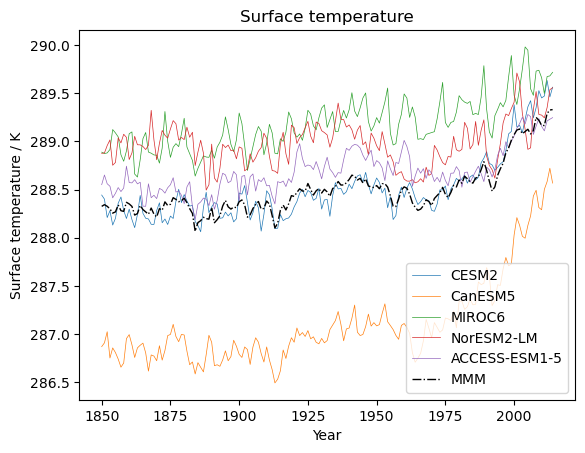

In [13]:

for model, cube in prep_cubes.items():
    # plot by year coordinate
    qplt.plot(cube.coord('year'), cube, label=model, linewidth=0.5)
    
qplt.plot(res_cube.coord('year'), res_cube, label='MMM', linewidth=1, linestyle='dashdot', color='k')

plt.legend()

### Save data to netcdf
- save the ensemble data before preprocessing steps so can be used in different analysis

In [14]:
## set path location to save data
outpath = '/scratch/iq82/fc6164/esmvaltool_output/process_data/'

In [15]:
import iris

## multi_model cannot merge different grid shapes (1980, 192, 288) != (1980, 64, 128)
cubes = [area_statistics(cube, operator="mean") for mod, cube in model_ens_cubes.items()] 
mmm_cube = multi_model_statistics(cubes, statistics=["mean"], span="overlap")['mean']

for model, cube in model_ens_cubes.items():
    iris.save(cube, outpath + f'{model}_ensemble_mean_ts.nc')

iris.save(mmm_cube, outpath + 'MMM_areamean_ts.nc')

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/netcdf/saver.py:2246: IrisCfSaveWarning: 'title' is being added as CF data variable attribute, but 'title' should only be a CF global attribute.
  warnings.warn(msg, category=iris.warnings.IrisCfSaveWarning)
